# Agenda
* Problem statement 
* About Dataset
* Loading Data
* Data Preprocessing
* Building Model
* Model Performance


# The Problem Statement

Building  a classifier to predict whether or not an horse is likely to survive colic based upon medical conditions.

the "outcome" variable in the data is the (Target).



Data Reference : http://archive.ics.uci.edu/ml/datasets/Horse+Colic

# About Data

1. TItle: Horse Colic database

2. Source Information
   -- Creators: Mary McLeish & Matt Cecile
	  	Department of Computer Science
		University of Guelph
		Guelph, Ontario, Canada N1G 2W1
		mdmcleish@water.waterloo.edu
   -- Donor:    Will Taylor (taylor@pluto.arc.nasa.gov)
   -- Date:     8/6/89

3. Past Usage:
   -- Unknown

4. Relevant Information:

   -- 2 data files
      -- horse-colic.data: 300 training instances
      -- horse-colic.test: 68 test instances
   -- Possible class attributes: 24 (whether lesion is surgical)
     -- others include: 23, 25, 26, and 27
   -- Many Data types: (continuous, discrete, and nominal)

5. Number of Instances: 368 (300 for training, 68 for testing)

6. Number of attributes: 28

# Loading Libraries

In [38]:
#Importing Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBClassifier

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(style = 'darkgrid')

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

import warnings
warnings.filterwarnings(action = 'ignore')

# Loading Data

In [39]:
#load data
df =pd.read_csv("clean_train1s.csv")
df_test =pd.read_csv("clean_test2s.csv")

# Previewing the Data

In [40]:
df.head(2)

,Unnamed: 0,surgery,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,cp_data,site of lesion,type,subtype,specific code
0,0,1.0,1,39.2,88.0,20.0,3.0,1,4,1,...,85.0,2,2.0,2,2,2,2.0,2.0,1,8
1,1,2.0,1,38.3,40.0,24.0,1.0,1,3,1,...,6.7,2,2.0,1,2,1,0.0,1.0,1,4


In [41]:
df.shape,df_test.shape

((299, 29), (67, 29))

In [42]:
df_test.columns

Index(['Unnamed: 0', 'surgery', 'Age', 'rectal temperature', 'pulse',
       'respiratory rate', 'temperature of extremities', 'peripheral pulse',
       'mucous membranes', 'capillary refill time', 'pain', 'peristalsis',
       'abdominal distension', 'nasogastric tube', 'nasogastric reflux',
       'nasogastric reflux PH', 'rectal examination', 'abdomen',
       'packed cell volume', 'total protein', 'abdominocentesis appearance',
       'abdomcentesis total protein', 'outcome', 'surgical lesion', 'cp_data',
       'site of lesion', 'type', 'subtype', 'specific code'],
      dtype='object')

In [43]:
#dropping irrelevant columns
col=["Unnamed: 0"]
df=df.drop(col,axis=1)
df_test = df_test.drop(col,axis=1)

#shape of dataset
df.shape,df_test.shape

((299, 28), (67, 28))

In [44]:
#checking the data types of the variables
df.dtypes

surgery                        float64
Age                              int64
rectal temperature             float64
pulse                          float64
respiratory rate               float64
temperature of extremities     float64
peripheral pulse                 int64
mucous membranes                 int64
capillary refill time            int64
pain                             int64
peristalsis                      int64
abdominal distension             int64
nasogastric tube                 int64
nasogastric reflux             float64
nasogastric reflux PH            int64
rectal examination               int64
abdomen                          int64
packed cell volume               int64
total protein                  float64
abdominocentesis appearance      int64
abdomcentesis total protein    float64
outcome                          int64
surgical lesion                  int64
cp_data                          int64
site of lesion                 float64
type                     

# Preprocessing the dataset

In [45]:
#splitting data into input and Target variable
X= df.drop('outcome', axis=1)
y= df["outcome"]


#standardizing the dataset
scaler =StandardScaler()
X_scaled =scaler.fit_transform(X)

#splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)


# Random Forest Classifier

The accuracy score is: 0.7888888888888889 and the f1 score is 0.7886519516149146


              precision    recall  f1-score   support

           1       0.80      0.82      0.81        49
           2       0.78      0.76      0.77        41

    accuracy                           0.79        90
   macro avg       0.79      0.79      0.79        90
weighted avg       0.79      0.79      0.79        90



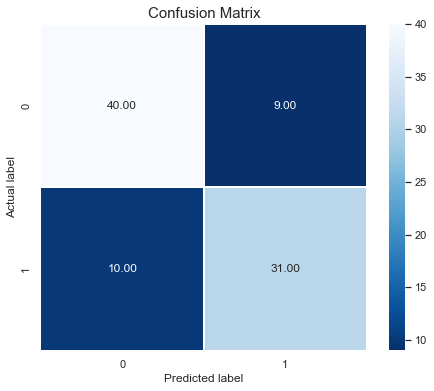

In [46]:
#creating classifier
rfc= RandomForestClassifier()

#training the model using the training sets
rfc.fit(X_train,y_train)

#predicting the test set
y_pred=rfc.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred,average="weighted")}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

#confusion_matrix(y_test, y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square =True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15)
plt.show()

In [47]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rfc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rfc.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.7889


# Hyperparameter Tuning using Hyperopt

In [82]:
from hyperopt import fmin,tpe,hp,Trials,STATUS_OK
from hyperopt.pyll.base import scope
from sklearn.model_selection import cross_val_score


space = {"n_estimators":hp.choice("n_estimators",[100,200,300,400,500,600]),
        "max_depth": hp.quniform("max_depth", 1, 15,1),
         "criterion":hp.choice("criterion",["gini","entropy"]),
        }

#define objective function

def hyperparameter_tuning(params):
    clf=RandomForestClassifier(**params,n_jobs=-1)
    acc =cross_val_score(clf,X_scaled,y,scoring="accuracy").mean()
    return {"loss":-acc,"status":STATUS_OK}



trials =Trials()

best=fmin(fn=hyperparameter_tuning, space= space,
         algo=tpe.suggest,max_evals=100,trials=trials)

print("best: {}".format(best))

The accuracy score is: 0.8111111111111111 and the f1 score is 0.8095630367475027


              precision    recall  f1-score   support

           1       0.80      0.88      0.83        49
           2       0.83      0.73      0.78        41

    accuracy                           0.81        90
   macro avg       0.81      0.80      0.81        90
weighted avg       0.81      0.81      0.81        90



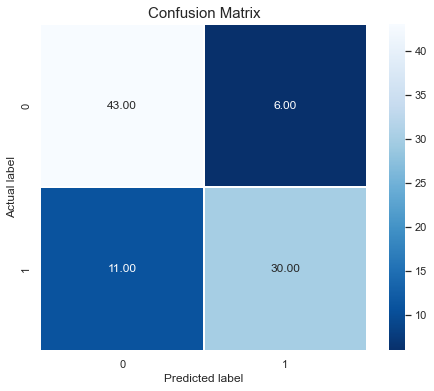

In [48]:

#creating a Random classifier using hyperparameters 
clf= RandomForestClassifier(n_estimators=20 , max_depth = 13 ,criterion = "entropy")


#training the model using the training sets
clf.fit(X_train,y_train)

#predicting the test set
y_pred=clf.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred,average="weighted")}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square =True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15)
plt.show()

In [49]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.9904
Test set score: 0.8111


# Feature Importance

In [50]:
# Creating a dataframe of features and their respective importances
#
impo_df = pd.DataFrame({'feature': X.columns, 'importance': np.round(clf.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df

,importance
feature,
pulse,0.0957
packed cell volume,0.0863
specific code,0.0843
type,0.0819
site of lesion,0.0710
mucous membranes,0.0610
rectal temperature,0.0558
respiratory rate,0.0541
total protein,0.0494


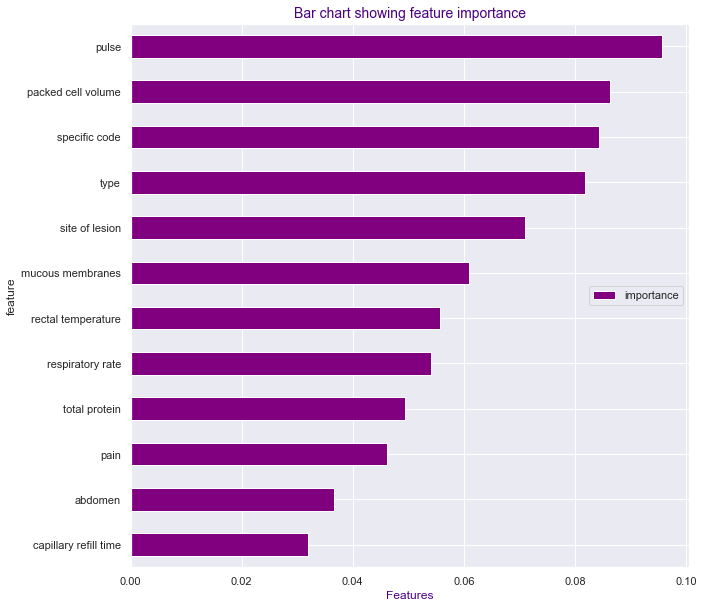

In [51]:
# Creating a bar chart of feature importance in descending order
#
impo_df = impo_df[:12].sort_values(by = 'importance', ascending = True)
impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

The accuracy score is: 0.7666666666666667 and the f1 score is 0.766093810569841


              precision    recall  f1-score   support

           1       0.80      0.81      0.81        54
           2       0.71      0.69      0.70        36

    accuracy                           0.77        90
   macro avg       0.76      0.75      0.76        90
weighted avg       0.77      0.77      0.77        90



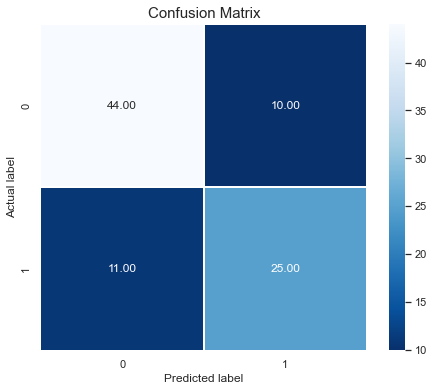

In [52]:
# Selecting only important features and the y variable
#
#X = X[['type', 'total protein', 'pulse', 'packed cell volume', 'specific code',  'rectal temperature', 'respiratory rate', 'site of lesion', 'mucous membrane', 'pain', 'abdomcentesis total protein', 'abdominal distension']]
cols=['type','rectal temperature', 'pulse', 'respiratory rate', 'mucous membranes','pain','temperature of extremities','packed cell volume', 'total protein', 'abdomen','site of lesion',  'specific code']
X=X[['type','rectal temperature', 'pulse', 'respiratory rate', 'mucous membranes','pain','temperature of extremities','packed cell volume', 'total protein', 'abdomen','site of lesion',  'specific code']]
y= df["outcome"]

#standardize the dataset

scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)

#split into train and test set

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,stratify=y,test_size=0.3,random_state=42)

#creating a Random classifier
clf= RandomForestClassifier(n_estimators=100,max_depth=13,criterion="entropy")

#training the model using the training sets
clf.fit(X_train,y_train)

#predicting the test set
y_pred=clf.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred,average="weighted")}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square =True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15)
plt.show()

In [53]:
#Cross Validation to check for the stability of the model

# Performing cross validation of ten folds
#
scores = cross_val_score(clf, X_scaled, y, scoring = 'f1', cv = 5)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {scores.mean()}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {scores.std()}')

Mean of cross validation scores is 0.8148129896682865
Standard deviation of the cross validation scores is 0.04459971952630142


In [54]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

ROC AUC : 0.7546
Cross validated ROC AUC : 0.8663


Optimal number of features : 11
Classifier score: 0.7667
              precision    recall  f1-score   support

           1       0.81      0.80      0.80        54
           2       0.70      0.72      0.71        36

    accuracy                           0.77        90
   macro avg       0.76      0.76      0.76        90
weighted avg       0.77      0.77      0.77        90



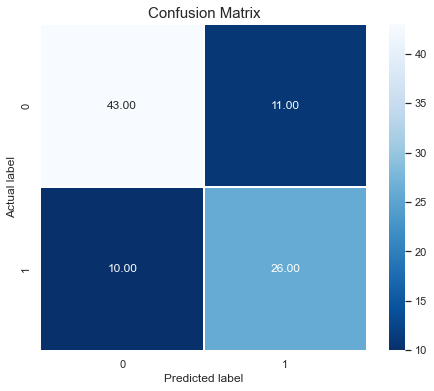

In [55]:
#Model Evaluation and improvement using Recursive Feature Elimination

from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='accuracy')

rfecv = rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# transform the training data

X_train_rfecv = rfecv.transform(X_train)


# train classifier

clf.fit(X_train_rfecv, y_train)

# test classifier on test data

X_test_rfecv = rfecv.transform(X_test)

y_pred_rfecv = clf.predict(X_test_rfecv)

# print mean accuracy on transformed test data and labels

print ("Classifier score: {:.4f}".format(clf.score(X_test_rfecv,y_test)))

print(f'{classification_report(y_test, y_pred_rfecv)}')

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rfecv)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square =True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15)


plt.show()

# Logistic Regression

The accuracy score is: 0.7222222222222222 and the f1 score is 0.7199373286329809


              precision    recall  f1-score   support

           1       0.75      0.80      0.77        54
           2       0.67      0.61      0.64        36

    accuracy                           0.72        90
   macro avg       0.71      0.70      0.71        90
weighted avg       0.72      0.72      0.72        90



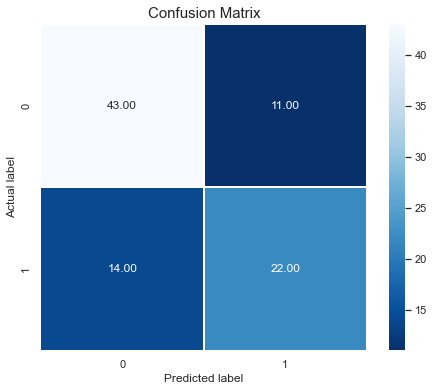

In [56]:
#creating classifier

log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)


#predicting the test set
y_pred=log_reg.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred,average="weighted")}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

#confusion_matrix(y_test, y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square =True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15)
plt.show()

In [57]:
# print the scores on training and test set TO CHECK FOR Overfitting

print('Training set score: {:.4f}'.format(log_reg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(log_reg.score(X_test, y_test)))

Training set score: 0.8134
Test set score: 0.7222


In [58]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

ROC AUC : 0.7037
Cross validated ROC AUC : 0.8502


Optimal number of features : 9
Classifier score: 0.7222
              precision    recall  f1-score   support

           1       0.75      0.81      0.78        54
           2       0.68      0.58      0.63        36

    accuracy                           0.72        90
   macro avg       0.71      0.70      0.70        90
weighted avg       0.72      0.72      0.72        90



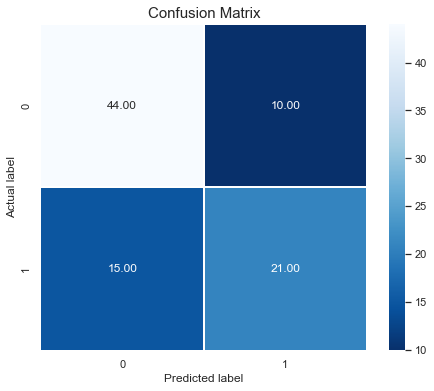

In [59]:
#Model Evaluation and improvement using Recursive Feature Elimination

from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=log_reg, step=1, cv=5, scoring='accuracy')

rfecv = rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# transform the training data

X_train_rfecv = rfecv.transform(X_train)


# train classifier

log_reg.fit(X_train_rfecv, y_train)

# test classifier on test data

X_test_rfecv = rfecv.transform(X_test)

y_pred_rfecv = log_reg.predict(X_test_rfecv)

# print mean accuracy on transformed test data and labels

print ("Classifier score: {:.4f}".format(log_reg.score(X_test_rfecv,y_test)))

print(f'{classification_report(y_test, y_pred_rfecv)}')

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rfecv)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square =True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15)


plt.show()

In [60]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_reg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.71428571 0.69047619 0.78571429 0.83333333 0.85365854]
Average cross-validation score: 0.7755


In [61]:
#Hyperparameter optimization using GridSearchCV.

from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = log_reg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV best score : 0.7755


Parameters that give the best results : 

 {'penalty': 'l2'}


Estimator that was chosen by the search : 

 LogisticRegression()
GridSearch CV score on test set: 0.7222


# Trying Different Classification Model

In [62]:
# Importing different classification models

from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Creating a list of classifier algorithms to compare with
#
models = [GradientBoostingClassifier(), RandomForestClassifier(), XGBClassifier(), KNeighborsClassifier(),\
          GaussianNB(), LogisticRegression()]

# Creating lists of the algorithms, to store the accuracy scores of each fold
#
GradientBoosting, RandomForest, XGB, KNeighbors, GaussianNB, LogisticRegression = ([] for x in range(6))

# Creating a list containig the list of each algorithm. Created for easy iteration
#
model_list = [GradientBoosting, RandomForest, XGB, KNeighbors, GaussianNB, LogisticRegression]

# Selecting the independent variables and the target variable

X= df.drop('outcome', axis=1)
y= df["outcome"]

#standardizing the dataset
scaler =StandardScaler()
X_scaled =scaler.fit_transform(X)

#splitting the dataset 
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)

# Creating a cross validation of 10 folds
#
kfold  = KFold(n_splits=10, shuffle = True)

# Iterating through each model and appending the scores of each fold to the appriopriate list
#
for i, j in zip(models, model_list):
  j.extend(list(cross_val_score(i, X_scaled, y, scoring = 'f1', cv = kfold)))
  
# Creating a dataframe of all the scores from the iterations for each model
#
scores = pd.DataFrame({'GradientBoosting': GradientBoosting, 'RandomForest': RandomForest, 'XGB': XGB,\
              'KNeighbors': KNeighbors, 'GaussianNB': GaussianNB, 'LogisticRegression': LogisticRegression}, index = range(1, 11))

# Calculating the mean and standard deviation score of each algorithm
#
scores.loc['mean'] = scores.mean()
scores.loc['std'] = scores.std()

# Previewing the scores dataframe
#
scores

[06:34:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:34:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:34:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:34:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,GradientBoosting,RandomForest,XGB,KNeighbors,GaussianNB,LogisticRegression
1,0.733333,0.829268,0.722222,0.833333,0.727273,0.666667
2,0.864865,0.871795,0.744186,0.685714,0.812500,0.863636
3,0.800000,0.863636,0.800000,0.750000,0.750000,0.850000
4,0.777778,0.838710,0.833333,0.571429,0.878049,0.809524
5,0.800000,0.904762,0.833333,0.810811,0.800000,0.777778
6,0.777778,0.787879,0.648649,0.756757,0.809524,0.764706
7,0.833333,0.875000,0.923077,0.758621,0.733333,0.702703
8,0.800000,0.722222,0.700000,0.810811,0.689655,0.857143
9,0.736842,0.857143,0.787879,0.789474,0.733333,0.742857
10,0.800000,0.800000,0.894737,0.731707,0.900000,0.789474
